# **Assignment#4**
### **Decision Tree, ML Analysis on the Titanic data**
    Dep  : Department of E-Business - Undergraduate, AJOU School of Business, Ajou University
    Code : 201823869 
    Name : seongwoo Cho

<br>

#### **INDEX** 

1. EDA & Summary <br>
2. Splitting into train & test <br>
3. Printing the feature importance values <br>
4. Building Decision Tree and Random Forest<br>
    - 4.1. Decision Tree <br>
    - 4.2. Random Forest
   <br><br>
5. Comparing four different ML models <br>
    - Logistic Regression
    - Random Forest Classifier
    - K-Neighbors Classifier
    - Gaussian Naive Bayes

<br><br>

---

<br><br>

## Preparing

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_ttn = pd.read_csv('./titanic_cleaned.csv')

## Features

1. Survival : Survival : 0=die, 1=survival
2. pcalss : Ticket class : 1=1st=Upper, 2=2nd=Middle, 3=3rd=Lower
3. sex_male : Sex : 0=female, 1=male 
4. Age : Age in years
5. sibsp : family relations in this way...Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored) : 0=yes,1=no : 
6. parch : Parent = mother, father / Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.
7. Fare : Fare : float
8. Ticket : Ticket number
9. cabin : Cabin number
10. Embarked_Q : Port of Embarkation, Queenstown 
11. Embarked_C : Port of Embarkation, Cherbourg

<br><br>

        ref : https://www.kaggle.com/competitions/titanic/data?select=test.csv
<br>

## Preparing

## **1. EDA**

In [141]:
df_ttn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   Sex_male    889 non-null    int64  
 7   Embarked_Q  889 non-null    int64  
 8   Embarked_S  889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.6 KB


In [142]:
df_ttn.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [143]:
df_ttn.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


TypeError: 'list' object is not callable

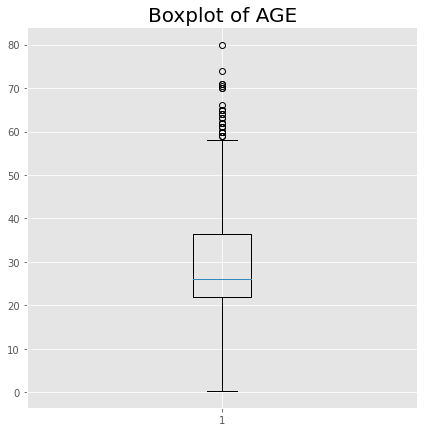

In [144]:
plt.style.use('ggplot')
plt.figure(figsize=(7,7))
plt.boxplot(data=df_ttn, x=df_ttn['Age'])
plt.title('Boxplot of AGE',fontsize=20)
plt.xlabel('Age')
plt.show()

c:\Python3.10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


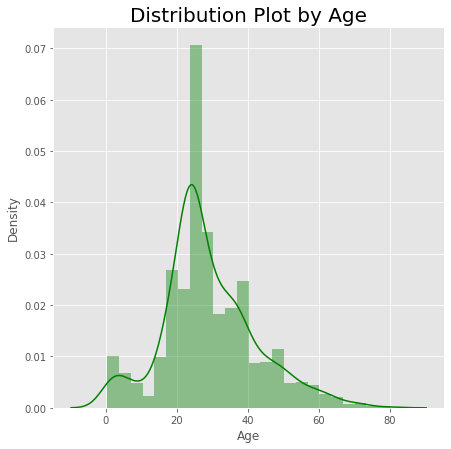

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(7,7))
sns.distplot(df_ttn['Age'], bins=24, color='green')
plt.title('Distribution Plot by Age',fontsize=20)
plt.xlabel('Age')
plt.show()

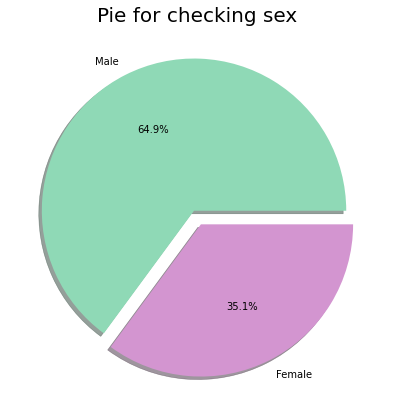

In [ ]:
sex_rat_total = df_ttn['Sex_male'].value_counts()[0] + df_ttn['Sex_male'].value_counts()[1]

sex_rat_male = df_ttn['Sex_male'].value_counts()[1] / sex_rat_total * 100
sex_rat_female = df_ttn['Sex_male'].value_counts()[0] / sex_rat_total * 100

ratio = [sex_rat_male,sex_rat_female]
labels = ['Male', 'Female']
explode = [0.05, 0.05]
colors = ['#8fd9b6', '#d395d0']

plt.figure(figsize=(7,7))
plt.pie(ratio, labels=labels, autopct= '%.1f%%', explode = explode, shadow=True ,colors=colors)
plt.title('Pie for checking sex', fontsize=20)
plt.show()


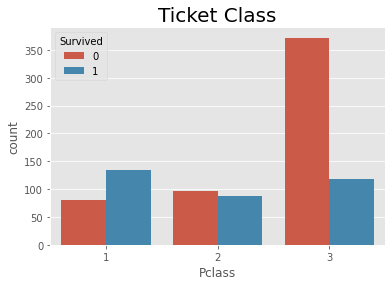

In [ ]:
sns.countplot(x='Pclass',data=df_ttn, hue='Survived')
plt.title('Survive or not by Pclass', fontsize= 20)

plt.show()


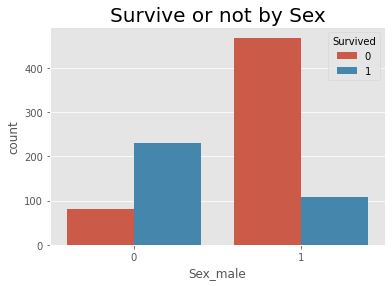

In [ ]:
sns.countplot(x='Sex_male',data=df_ttn, hue='Survived')
plt.title('Survive or not by Sex', fontsize= 20)

plt.show()


## **2. Splitting into Train & Test**

In [ ]:
from sklearn.model_selection import train_test_split

# Assign into X,y
X_list = df_ttn.columns.difference(['Survived']).values

X = df_ttn[X_list]
y = df_ttn['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101) 
    # The “random_state” value is used for initializing the internal random number generator which decides how to split all the data into the train and test sets.

In [ ]:
print('X train :', len(X_train))
print('y train :', len(y_train))
print('X test  :', len(X_test))
print('y test  :', len(y_test))

X train : 622
y train : 622
X test  : 267
y test  : 267


## **3. Printing the feature importance values**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

c_rf = RandomForestClassifier(n_estimators=100) # n_estimators : Number of Trees which will be made

c_rf.fit(X_train, y_train)

c_rf_fi = pd.DataFrame(c_rf.feature_importances_,X_train.columns, columns=['Feature Importance'])

pd.DataFrame(c_rf_fi['Feature Importance'].sort_values(ascending=False), columns=['Feature Importance'])

,Feature Importance
Fare,0.275320
Age,0.265610
Sex_male,0.246736
Pclass,0.088516
SibSp,0.045997
Parch,0.043735
Embarked_S,0.022534
Embarked_Q,0.011552


## **4. Building Decision Tree and Random Forest**

### 4.1 Deicision Tree Classsifier

#### - 4.1.1 Build, Fit, and Predict

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#instantiate the DecisionTreeClassifier model with gini index for criterion
c_dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) #Using gini index for criterion

# fitting
c_dt_gini.fit(X_train,y_train)

y_pred_gini = c_dt_gini.predict(X_test)

#### - 4.1.3 Check accuracy score with criterion gini index

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with gini index: 0.8464


#### - 4.1.4 Check for overfitting and underfitting

In [ ]:
print('Train set Score : {:.4f}'.format(c_dt_gini.score(X_train,y_train)))

print('Test set Score : {:.4f}'.format(c_dt_gini.score(X_test,y_test)))

Train set Score : 0.8248
Test set Score : 0.8464


Train accuracy score is 0.8248 while the test accuracy to be 0.8464. These two values are quite similar. So, there is no sign of over & under fitting. <br><br>

#### - 4.1.5 Visualize the Decision Tree model

[Text(0.5, 0.875, 'X[6] <= 0.5\ngini = 0.471\nsamples = 622\nvalue = [386, 236]'),
 Text(0.25, 0.625, 'X[5] <= 2.5\ngini = 0.396\nsamples = 224\nvalue = [61, 163]'),
 Text(0.125, 0.375, 'X[0] <= 2.5\ngini = 0.138\nsamples = 121\nvalue = [9, 112]'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1875, 0.125, 'gini = 0.125\nsamples = 119\nvalue = [8, 111]'),
 Text(0.375, 0.375, 'X[3] <= 23.35\ngini = 0.5\nsamples = 103\nvalue = [52, 51]'),
 Text(0.3125, 0.125, 'gini = 0.49\nsamples = 84\nvalue = [36, 48]'),
 Text(0.4375, 0.125, 'gini = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(0.75, 0.625, 'X[0] <= 13.0\ngini = 0.3\nsamples = 398\nvalue = [325, 73]'),
 Text(0.625, 0.375, 'X[7] <= 2.0\ngini = 0.491\nsamples = 23\nvalue = [10, 13]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.6875, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.875, 0.375, 'X[3] <= 26.269\ngini = 0.269\nsamples = 375\nvalue = [315, 60]'),
 Text(0

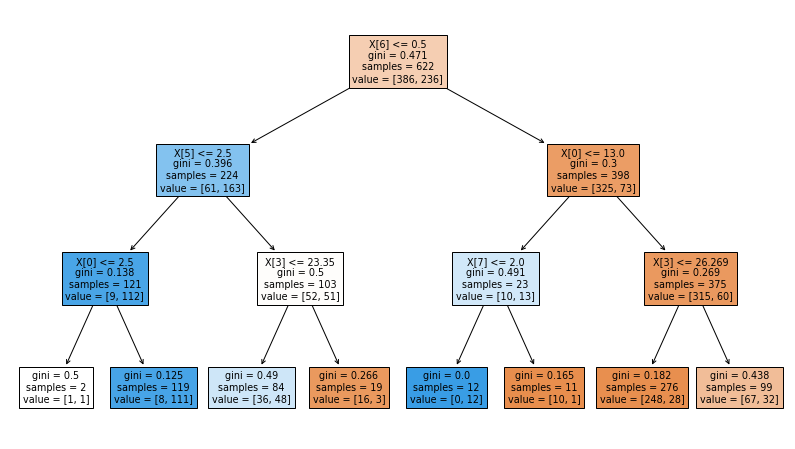

In [ ]:
from sklearn import tree


plt.figure(figsize=(14,8))
tree.plot_tree(c_dt_gini.fit(X_train,y_train),filled=True)

### 4.2 Random Forest Classifier

#### - 4.1.1 Build, Fit, and Predict

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

c_rf_entropy = RandomForestClassifier(n_estimators=100,criterion='entropy') # using Entropy
c_rf_entropy.fit(X_train, y_train)



RandomForestClassifier(criterion='entropy')

#### - 4.1.2 Check Accuracy for overfitting and underfitting

In [ ]:

print('Train set Accuracy Score : {:.4f}'.format(c_rf_entropy.score(X_train,y_train)))

print('Test set Accuracy Score : {:.4f}'.format(c_rf_entropy.score(X_test,y_test)))


Train set Accuracy Score : 0.9871
Test set Accuracy Score : 0.8090


Considering the gap of Train and Test Accuracy, about 0.16, it is easy to assume that there is a possibility of overfitting.

<br>

#### - 4.1.3 Visualize the model

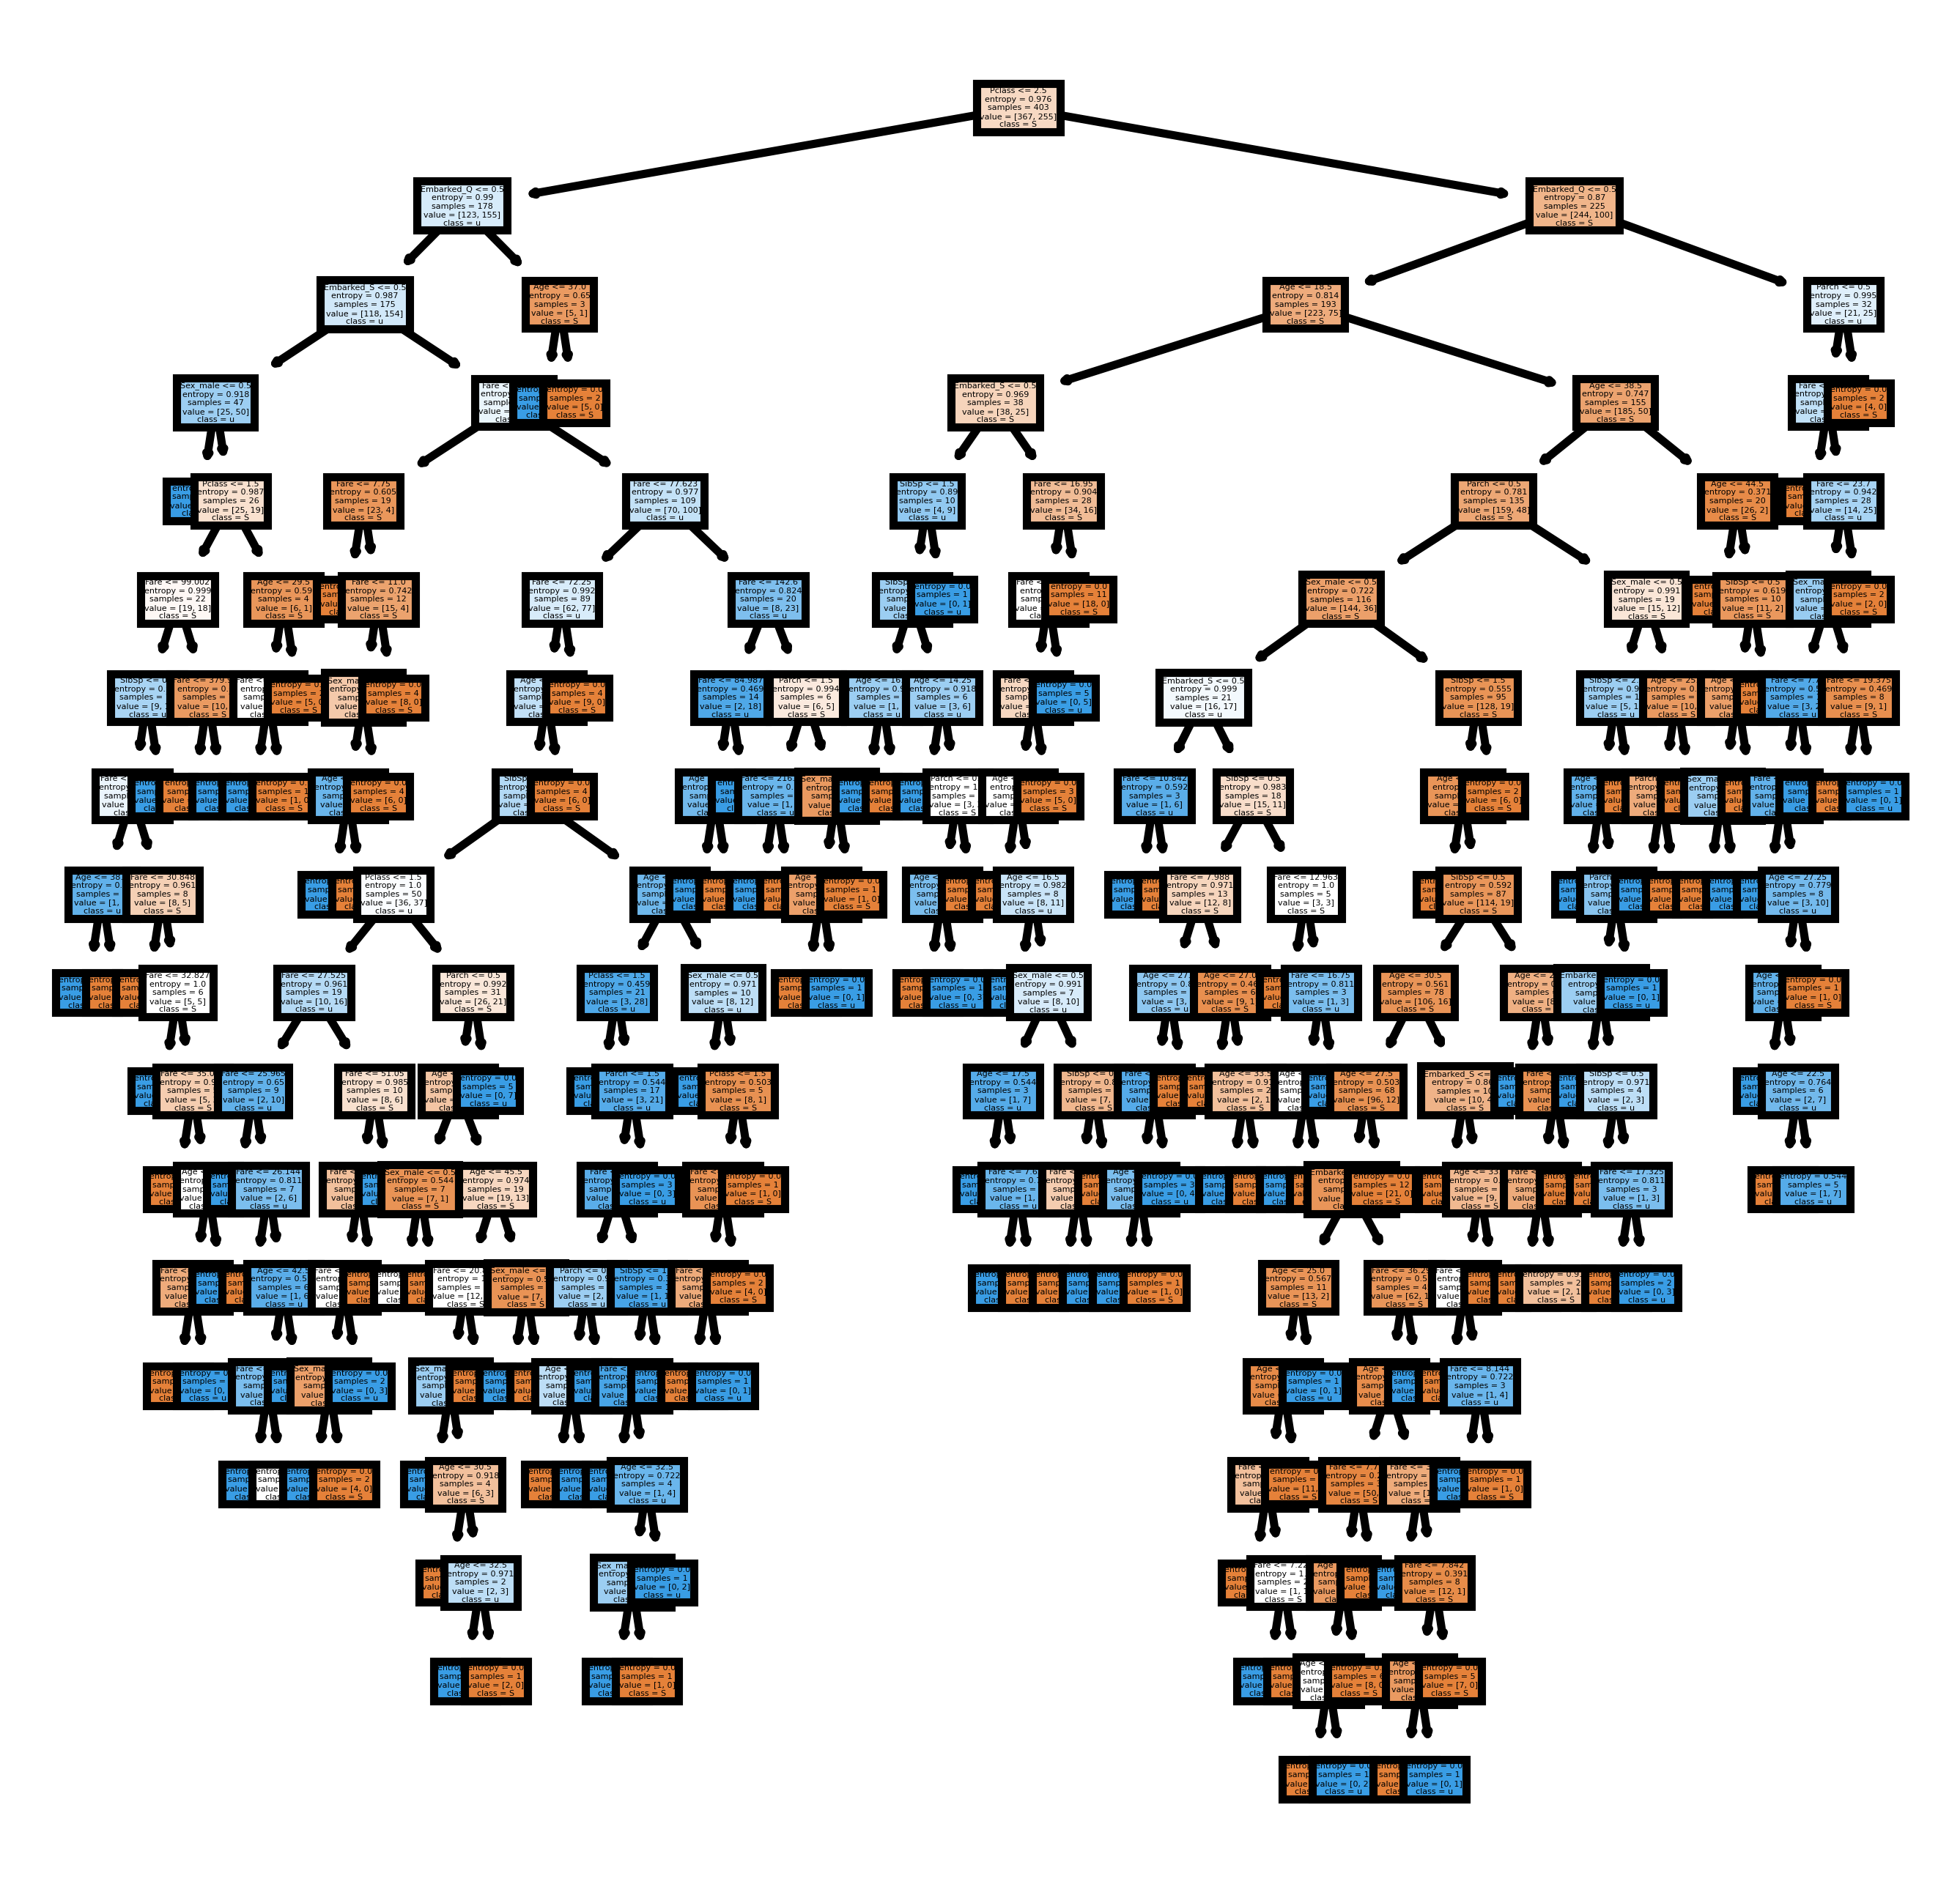

In [ ]:
from sklearn import tree

fn=X_list
cn='Survived'

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(c_rf_entropy.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);


<br>

<br>

## **5. Comparing four different ML models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

### - Prepare models

In [ ]:
models= []
models.append(('LR',LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('RFC',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))

### - Get each model's Accuracy Score and Evaluate

In [ ]:
for name, model in models :
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test,predictions)
    msg = "%s: %f" % (name, acc_score)
    
    print(msg)

LR: 0.831461
RFC: 0.808989
KNN: 0.692884
NB: 0.805243


- Logistic Regression Model looks good for 0.83.. .<br>
- KNN's accuracy is pretty bad for 0.69.. .

<br><br>

### - Get an f1 score for each of the ML models

In [ ]:
from sklearn.metrics import f1_score

#evaluate each model
for name, model in models :
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    f_score = f1_score(y_test, predictions)
    msg="%s: %f" % (name, f_score)
    print(msg)

LR: 0.761905
RFC: 0.748768
KNN: 0.601942
NB: 0.731959


The higher the f1 score, the better the model's performance. <br><br>
So, in the side of f1 score, also, the Logistic Regression is the most useful classifier for predicting whether survive or not in titanic. <br><br>

Surely, I know the approach I made for building the four , in this section, has poor details.<br> so, these conclusions might have a problem overlooking overfitting problems and the other hazards.  <br>

Later, I'll study in more depth how to improve the models and how to handle and avoid overfitting and underfitting issues.
And also, will update version of this continuously, in my kaggle notebooks.